In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import emoji
import matplotlib.font_manager as font_manager

In [24]:
# Emoji map in emoji_overview.png
EMOJIS = ":joy: :unamused: :weary: :sob: :heart_eyes: \
:pensive: :ok_hand: :blush: :heart: :smirk: \
:grin: :notes: :flushed: :100: :sleeping: \
:relieved: :relaxed: :raised_hands: :two_hearts: :expressionless: \
:sweat_smile: :pray: :confused: :kissing_heart: :heartbeat: \
:neutral_face: :information_desk_person: :disappointed: :see_no_evil: :tired_face: \
:v: :sunglasses: :rage: :thumbsup: :cry: \
:sleepy: :yum: :triumph: :hand: :mask: \
:clap: :eyes: :gun: :persevere: :smiling_imp: \
:sweat: :broken_heart: :yellow_heart: :musical_note: :speak_no_evil: \
:wink: :skull: :confounded: :smile: :stuck_out_tongue_winking_eye: \
:angry: :no_good: :muscle: :facepunch: :purple_heart: \
:sparkling_heart: :blue_heart: :grimacing: :sparkles:".split(' ')


# Plot emoji distribution
# Input: an array of X*64
def plot_emoji_dist(probs):
    font = {'fontname': 'Noto Emoji'}
    sns.set(style="whitegrid", palette="muted", color_codes=True)
    f, axes = plt.subplots(16, 4, figsize=(16, 64), sharex=True)
    sns.despine(left=True)

    for i in range(len(EMOJIS)):
#         print ((emoji.emojize(EMOJIS[i], use_aliases=True)).title())
        sns.distplot(probs[:, i], label=emoji.emojize(EMOJIS[i], use_aliases=True),
                     ax=axes[int(i/4), int(i%4)]).set_title(emoji.emojize(EMOJIS[i], use_aliases=True) 
                                                            + ' ' + EMOJIS[i]) #, **font
    plt.show()

In [25]:
train_pkl = pickle.load(open('datasets/cornell/train/sentences.pkl', 'rb'))
print ('Number of training lines: ', len(train_pkl))

train_probs = pickle.load(open('datasets/cornell/train/sentences_emojis.pkl', 'rb'))
print ('Number of emojized training lines', len(train_probs))

Number of training lines:  66477
Number of emojized training lines 4201


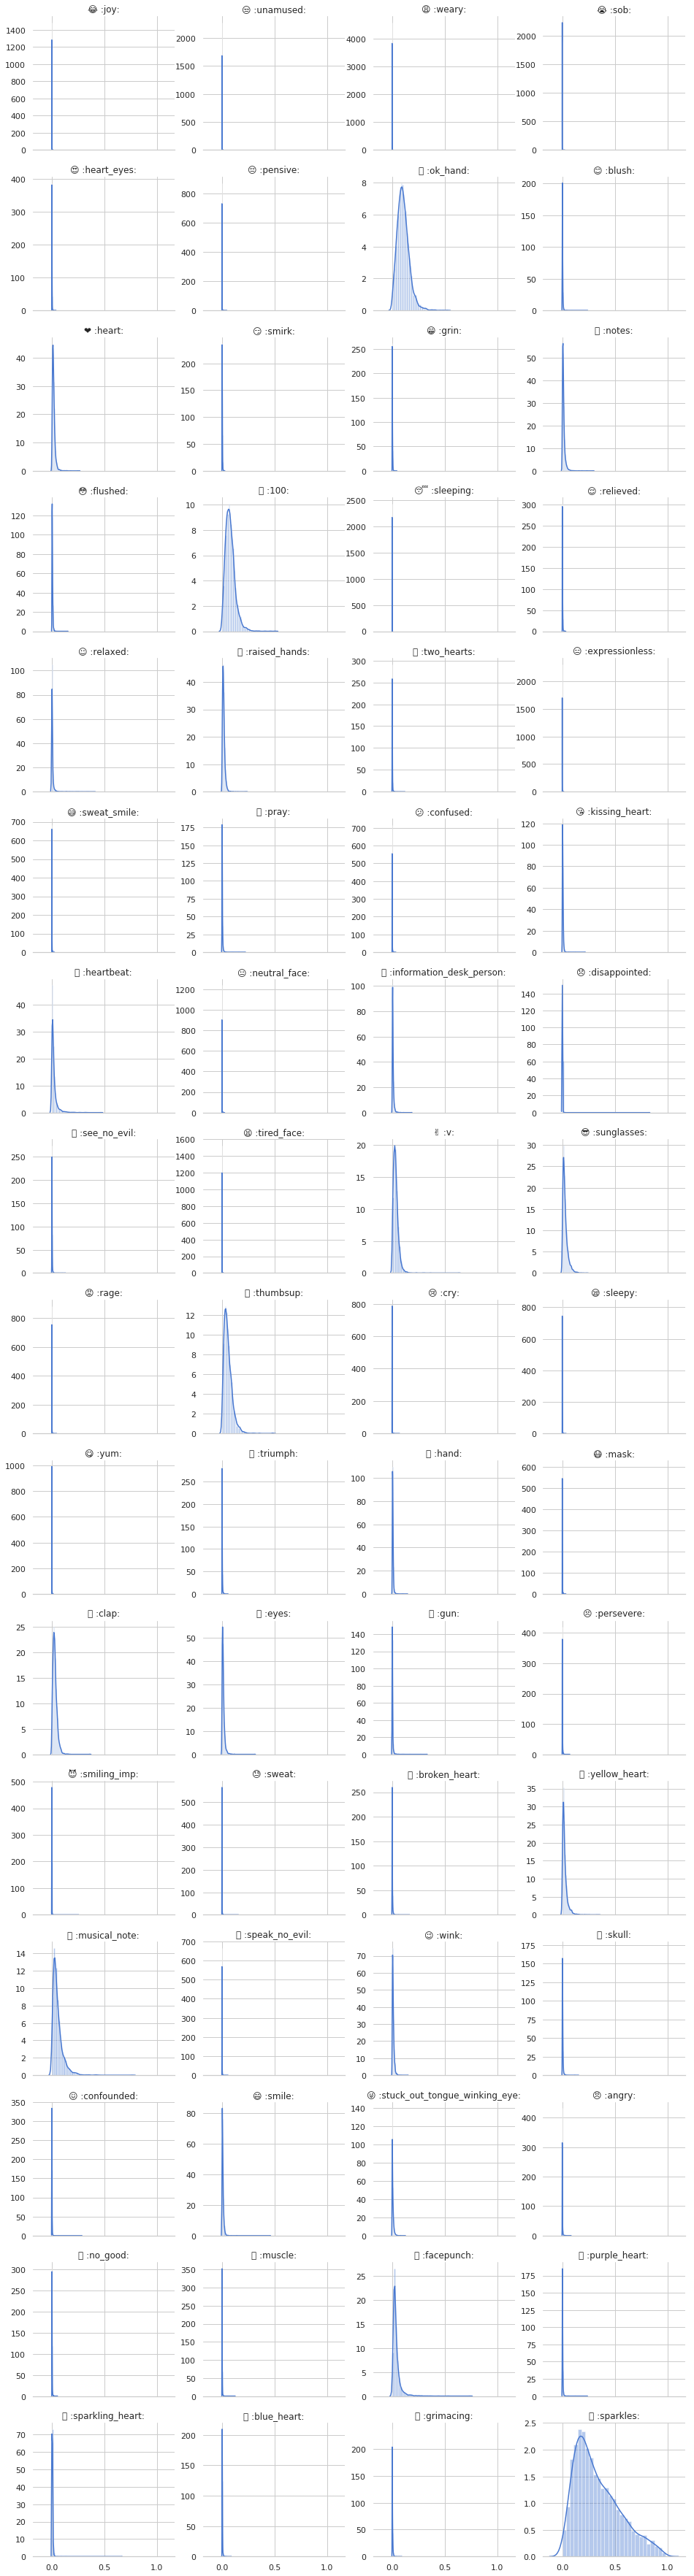

In [26]:
plot_emoji_dist (np.asarray(train_probs))

# Legacy

In [6]:
font_dirs = ['/mas/u/asma_gh/A-Hierarchical-Latent-Structure-for-Variational-Conversation-Modeling/fonts/', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
print (font_list)

# font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

[<Font 'Noto Serif Tamil' (NotoSerifTamil-SemiCondensedThin.ttf) normal normal 400 normal>, <Font 'Noto Serif Thai' (NotoSerifThai-ExtraCondensedBlack.ttf) normal normal 400 normal>, <Font 'Noto Sans Hebrew' (NotoSansHebrew-SemiBold.ttf) normal normal 400 normal>, <Font 'Noto Serif Ethiopic' (NotoSerifEthiopic-CondensedBold.ttf) normal normal 700 normal>, <Font 'Noto Sans Myanmar' (NotoSansMyanmar-ExtraCondensedExtraBold.ttf) normal normal 400 normal>, <Font 'Noto Sans Thai' (NotoSansThai-ExtraLight.ttf) normal normal 400 normal>, <Font 'Noto Sans Armenian' (NotoSansArmenian-SemiCondensedExtraBold.ttf) normal normal 400 normal>, <Font 'Noto Sans Display' (NotoSansDisplay-CondensedBlack.ttf) normal normal 400 normal>, <Font 'Noto Sans' (NotoSans-Condensed.ttf) normal normal 400 normal>, <Font 'Noto Serif Thai' (NotoSerifThai-ExtraLight.ttf) normal normal 400 normal>, <Font 'Noto Sans Arabic UI' (NotoSansArabicUI-SemiCondensedExtraBold.ttf) normal normal 400 normal>, <Font 'Noto Sans Sha